In [1]:
TH1D *hTOF= new TH1D("hTOF","Time of flight", 1000,0,100);

In [2]:
// 1.打开文件，得到TTree指针
  TFile *ipf=new TFile("tree.root");//打开ROOT文件
  if (ipf->IsZombie()) {
   cout << "Error opening file" << endl;
   exit(-1);
  }
  ipf->cd();
  TTree *tree=(TTree*)ipf->Get("tree");//得到名字为“tree”的TTree指针

//2. 声明tree的Branch变量

  Double_t x;
  Double_t e;
  int pid;
  Double_t tof, ctof;
  Double_t tu, td;
  Double_t qu, qd;

In [3]:
//3. 将变量指向对应Branch的地址
  tree->SetBranchAddress("ctof",&ctof);//将ROOT文件内tree内名为"ctof"的branch的数据的指针指向ctof的变量。
  tree->SetBranchAddress("tof",&tof);  
  tree->SetBranchAddress("pid",&pid);
  tree->SetBranchAddress("tu",&tu);   
  tree->SetBranchAddress("td",&td);
  tree->SetBranchAddress("qu",&qu);   
  tree->SetBranchAddress("qd",&qd);

In [4]:
Long64_t nentries=tree->GetEntries();//得到tree的事件总数
  for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
    tree->GetEntry(jentry);//将第jentry个事件数据填入对应变量(步骤3.中指向的变量)，每次变量值会变成当前事件对应的数据。
    hTOF->Fill(ctof);
    if(jentry%100000==0) cout<<"process "<<jentry<<" of "<<nentries<<endl;
  }

process 0 of 100000


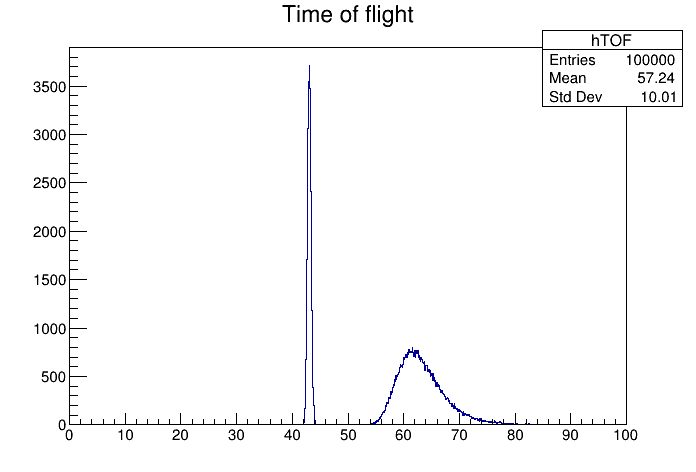

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [5]:
hTOF->Draw();
c1->Draw();
ipf->Close();